#Hackathon - Second Quantum Computing School
##Group: QNat
Alberto Bezerra de Palhares Junior   
Joab Morais Varela  
Moisés da Rocha Alves  
Paulo Vitor de Queiroz Ferreira  
Tailan Santos Sarubi
#Bose-Einstein Condensates and the Involvement in Advances for New Technologies
##Challenge: $a$ and $b$



##What happens? Why?

We can see that state B has large oscillations when compared to state A. This is due to the fact that state A is a eigenstate of the oscillator, while state B is not.

Here we import all the libraries that we will need to use.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Here we define the hyper parameters of the problem, and the variable to save our evolution data:

The time-step $\Delta t$, the spatial domain $L$, and the spatial step $\Delta x$.

In [ ]:
# Settings the variables and initial conditions

#Spacial Settings
N = 100  #Number of x points
L = 5.0  # Domain size [-L, L]
dx = 2*L/N  # Spatial step
x = np.linspace(-L, L, N)

#Temporal Settings
dt = 0.001  #Time step #Worls well with N = 100
time_limit = 5  #Limit time evolution
time_steps = int(time_limit / dt) #Time points number
time_list = np.arange(0,time_limit,dt) #Time points list $Just for time stamp plot

#System configurations
potential = 0.5*x**2 #potential

#State variables arrays
R_array = np.zeros((time_steps, len(x)))
I_array = np.zeros((time_steps, len(x)))
P_array = np.zeros((time_steps, len(x)))

RB_array = np.zeros((time_steps, len(x)))
IB_array = np.zeros((time_steps, len(x)))
PB_array = np.zeros((time_steps, len(x)))

Now we will do the first step in the time evolution:

$R(x,0) = \psi(x,0)$.

$I(x, \Delta t/2) = I(x, 0) - H[R(x, 0)]\Delta t/2$. (Half step evolution in the next section)

Begining with the initial state from item $A$ and $B$:

$\psi_A(x, 0) = \left(\dfrac{1}{\pi} \right)^{1/4}e^{-x^2/2}$,

$\psi_B(x, 0) = \left(\dfrac{2}{\pi} \right)^{1/4}e^{-x^2}$.

In [ ]:
# Initial values for R and I, for both states
R = (1 / np.pi)**0.25 * np.exp(-x**2 / 2)
I = np.zeros(N)

RB = (2 / np.pi)**0.25 * np.exp(-x**2)
IB = np.zeros(N)

Now we define some functions that will be needed including the potencial:

$V(x) = \frac{1}{2}x^2$,

the Hamiltonian included at `evolve()`:

$H = - \dfrac{1}{2}\dfrac{\partial^2 \psi}{\partial x^2} + V(x)$,

with $\dfrac{\partial^2 f(x_i, t_j)}{\partial x^2} \approx
\left[\dfrac{f(x_{i+1}, t_j) -2f(x_i,t_j) + f(x_{i-1}, t_j)}{(\Delta x)^2} \right]$,

In [ ]:
#Derivative fuction
def second_derivative(f, dx):
    return (np.roll(f, -1) - 2 * f + np.roll(f, 1)) / dx**2

#Evolution function
def evolve(R, I, potential, dx, dt):

    I_new = I - dt * (-0.5 * second_derivative(R, dx) + potential * R)
    R_new = R + dt * (-0.5 * second_derivative(I_new, dx) + potential * I_new)
    I_new = I_new - dt * (-0.5 * second_derivative(R_new, dx) + potential * R_new)

    return R_new, I_new

Let's check if our $\Delta t$ and $\Delta x$ are valid with our stability condition:

$-\frac{2}{\Delta t} < V < \frac{2}{\Delta t} - \frac{2}{(\Delta x)^2}$

Text(0, 0.5, '$V(x)$')

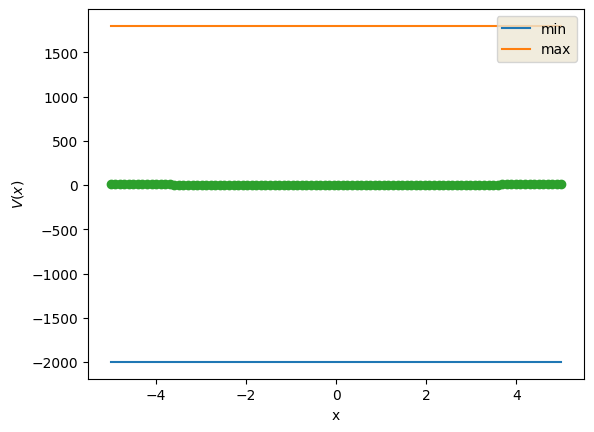

In [ ]:
min = -2/dt
max = 2/dt-2/dx**2
min_c = np.full_like(x, min)
max_c = np.full_like(x, max)
plt.plot(x, min_c, label ='min')
plt.plot(x, max_c, label ='max')
plt.plot(x, potential,'o-')
plt.style.use('Solarize_Light2')
plt.title("")
plt.legend()
plt.xlabel('x')
plt.ylabel('$V(x)$')

Now we create the functions to do our time evolution for R and I:

$R(x, t + \Delta t) = R(x, t - \Delta t/2) + \Delta t H[I(x, t)]$,

where $t = \{ 0, \Delta t, 2\Delta t, 3\Delta t, \ldots \}$.

$I(x, t + \Delta t) = R(x, t - \Delta t/2) - \Delta t H[R(x, t)]$,

where $t = \{\Delta t/2, 3\Delta t/2, 5\Delta t/2, 7 \Delta t/2, \ldots \}$.

In [ ]:
#Applying the evolution over the states A and B
for t in range(time_steps):
    R, I = evolve(R, I, potential, dx, dt)

    R_array[t] = R
    I_array[t] = I

    RB, IB = evolve(RB, IB, potential, dx, dt)
    RB_array[t] = RB
    IB_array[t] = IB

Now we create our Probability density function using:

$P(x, t) = R(x, t)^2 + I(x, t + \Delta t/2)I(x, t - \Delta t/2)$,

In [ ]:
#Calculating the probability density
for i_time in range(time_steps):
    for i_pos in range(len(x)):
        if i_pos == 0:
            P_array[i_time][i_pos] = (R_array[i_time][i_pos])**2 + I_array[i_time][i_pos]*I_array[i_time][-1]
            PB_array[i_time][i_pos] = (RB_array[i_time][i_pos])**2 + IB_array[i_time][i_pos]*IB_array[i_time][-1]

        else:
            P_array[i_time][i_pos] = (R_array[i_time][i_pos])**2 + I_array[i_time][i_pos]*I_array[i_time][i_pos-1]
            PB_array[i_time][i_pos] = (RB_array[i_time][i_pos])**2 + IB_array[i_time][i_pos]*IB_array[i_time][i_pos-1]


Ploting the $P(x,t)$ evolution. (cosider to see the .mp4 video at the files (the is also an .gif but it is too slow).)

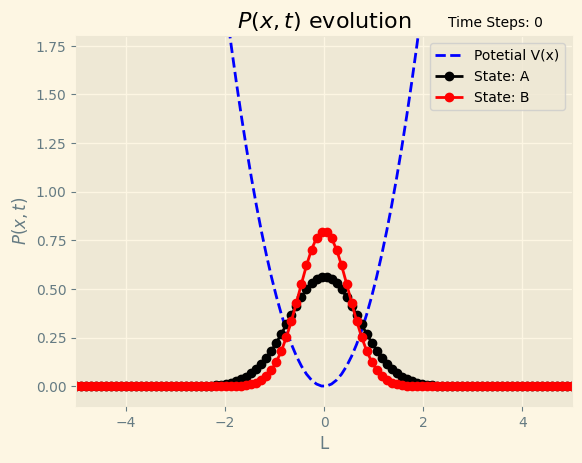

In [ ]:
#Ploting the figure and creating an animation (cosider see the .mp4 video at the files (the is also an .gif but it is too slow))

fig, ax = plt.subplots()
plt.style.use('Solarize_Light2')
plt.title("$P(x,t)$ evolution")
v_plot = ax.plot(x, potential,'b--' ,label='Potetial V(x)')[0]
p_plot = ax.plot(x, P_array[0],'ko-' ,label='State: A')[0]
pb_plot = ax.plot(x, PB_array[0],'ro-' ,label='State: B')[0]

ax.set(xlim=[-L, L],ylim=[-0.1,1.8], xlabel='L', ylabel='$P(x,t)$')

ts = f'Time Steps: {range(time_steps)[0]} '
tx = ax.text(2.5,1.85, ts)

ax.legend()

In [ ]:
def update(frame):
    # for each frame, update the data stored on each artist.
    # update the line plot:

    v_plot.set_xdata(x)
    v_plot.set_ydata(potential)

    p_plot.set_xdata(x)
    p_plot.set_ydata(P_array[frame])

    pb_plot.set_xdata(x)
    pb_plot.set_ydata(PB_array[frame])



    ts = f'Time Steps: {range(time_steps)[frame]}'
    tx.set_text(ts)
    '''
    if frame%100 ==0:
        print(frame)
    '''
    return p_plot

In [ ]:
ani = animation.FuncAnimation(fig=fig, func=update, frames=time_steps, interval=0.05)
plt.show()
ani.save('Challenge_A_B.gif')

0
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
